In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('data file/uswtdb_v2_3_20200109.csv')
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63003 entries, 0 to 63002
Data columns (total 25 columns):
case_id       63003 non-null int64
faa_ors       55784 non-null object
faa_asn       56242 non-null object
usgs_pr_id    41334 non-null float64
eia_id        57085 non-null float64
t_state       63003 non-null object
t_county      63003 non-null object
t_fips        63003 non-null int64
p_name        63003 non-null object
p_year        61463 non-null float64
p_tnum        63003 non-null int64
p_cap         58348 non-null float64
t_manu        57308 non-null object
t_model       56739 non-null object
t_cap         57473 non-null float64
t_hh          55213 non-null float64
t_rd          56275 non-null float64
t_rsa         56093 non-null float64
t_ttlh        55211 non-null float64
t_conf_atr    63003 non-null int64
t_conf_loc    63003 non-null int64
t_img_date    42136 non-null object
t_img_srce    63003 non-null object
xlong         63003 non-null float64
ylat          63003 no

In [4]:
# shape of the dataframe- 63003 rows & 25 columns
df.shape

(63003, 25)

In [5]:
df.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3073404,NaN,NaN,5806.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.352531,35.087852
1,3073414,NaN,NaN,5778.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.353035,35.086193
2,3011331,NaN,NaN,4951.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.356697,35.086670
3,3001002,NaN,NaN,4950.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.357185,35.086594
4,3073425,NaN,NaN,4957.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/2018,Digital Globe,-118.360420,35.084709


In [6]:
# random rows from the dataset
df.sample(5, random_state=55)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
46110,3073994,NaN,NaN,15236.0,50281.0,CA,Riverside County,6065,San Gorgonio Farms Wind Farm,2015.0,...,40.0,42.0,1385.44,60.9,2,3,11/3/2018,Digital Globe,-116.630318,33.927670
50944,3044545,48-031710,2012-WTW-5634-OE,NaN,57983.0,TX,Borden County,48033,Stephens Ranch 1,2014.0,...,80.0,100.0,7853.98,130.1,3,3,12/31/2016,Digital Globe,-101.675232,32.877895
20987,3071555,NaN,NaN,5010.0,56275.0,CA,Kern County,6029,H & S - Tehachapi,1985.0,...,NaN,17.0,226.98,NaN,2,3,5/8/2018,Digital Globe,-118.362137,35.080685
40890,3038887,17-021893,2011-WTE-5186-OE,22180.0,57675.0,IL,Ford County,17053,Pioneer Trail,2011.0,...,80.0,82.5,5345.62,121.3,3,3,1/1/2012,NAIP,-87.984192,40.465492
61864,3004174,NaN,NaN,3677.0,NaN,CA,Kern County,6029,unknown Tehachapi Wind Resource Area 1,1982.0,...,NaN,NaN,NaN,NaN,1,3,11/28/2017,Digital Globe,-118.279091,35.095196


In [7]:
# describing the countable variables
df.describe()

,case_id,usgs_pr_id,eia_id,t_fips,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,xlong,ylat
count,6.300300e+04,41334.000000,57085.000000,63003.000000,61463.000000,63003.000000,58348.000000,57473.000000,55213.000000,56275.000000,56093.000000,55211.000000,63003.000000,63003.000000,63003.000000,63003.000000
mean,3.046810e+06,26747.508879,56768.130963,30981.997016,2009.041456,101.897862,141.061849,1744.390079,78.377308,87.189894,6381.428501,122.512282,2.715537,2.863134,-100.943918,38.430628
std,2.590199e+04,13831.327745,6443.453549,16157.338212,8.552151,102.123356,90.868197,675.280326,12.460941,23.335317,2870.573172,22.126839,0.626594,0.498733,11.807640,5.396060
min,3.000001e+06,1.000000,90.000000,2013.000000,1981.000000,1.000000,0.050000,50.000000,18.200000,11.000000,95.030000,26.700000,1.000000,1.000000,-171.713074,13.389381
25%,3.026878e+06,17152.250000,56484.000000,18181.000000,2007.000000,50.000000,77.700000,1500.000000,80.000000,77.000000,4656.630000,118.600000,3.000000,3.000000,-103.857163,34.508576
50%,3.043313e+06,27678.500000,57261.000000,35005.000000,2011.000000,81.000000,130.500000,1715.000000,80.000000,88.000000,6082.120000,124.100000,3.000000,3.000000,-99.757813,38.503395
75%,3.067840e+06,38337.750000,58773.000000,48117.000000,2015.000000,120.000000,200.000000,2100.000000,80.000000,101.000000,8011.850000,134.100000,3.000000,3.000000,-95.319401,42.730679
max,3.096960e+06,49135.000000,62736.000000,72133.000000,2019.000000,796.000000,495.010000,6000.000000,130.000000,150.000000,17671.460000,198.100000,3.000000,3.000000,144.722656,66.839905


In [8]:
df.nunique() #count of the unique values for each column

case_id       63003
faa_ors       55763
faa_asn       55719
usgs_pr_id    41312
eia_id         1029
t_state          45
t_county        542
t_fips          660
p_name         1566
p_year           38
p_tnum          177
p_cap           648
t_manu           70
t_model         273
t_cap            76
t_hh             83
t_rd             93
t_rsa            93
t_ttlh          194
t_conf_atr        3
t_conf_loc        3
t_img_date      759
t_img_srce        4
xlong         56619
ylat          53461
dtype: int64

In [9]:
# Data Cleaning & Handling missing values
df.isnull().sum()

case_id           0
faa_ors        7219
faa_asn        6761
usgs_pr_id    21669
eia_id         5918
t_state           0
t_county          0
t_fips            0
p_name            0
p_year         1540
p_tnum            0
p_cap          4655
t_manu         5695
t_model        6264
t_cap          5530
t_hh           7790
t_rd           6728
t_rsa          6910
t_ttlh         7792
t_conf_atr        0
t_conf_loc        0
t_img_date    20867
t_img_srce        0
xlong             0
ylat              0
dtype: int64

In [3]:
# I filled useable missing values with their mean
fill_columns=['p_cap', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 'p_year']
for cols in fill_columns:
    df[cols].fillna((df[cols].mean()), inplace=True)    

In [4]:
# dropping columns with the missing values
df.dropna(how='any', axis=1, inplace=True)
df.isnull().sum()

case_id       0
t_state       0
t_county      0
t_fips        0
p_name        0
p_year        0
p_tnum        0
p_cap         0
t_cap         0
t_hh          0
t_rd          0
t_rsa         0
t_ttlh        0
t_conf_atr    0
t_conf_loc    0
t_img_srce    0
xlong         0
ylat          0
dtype: int64

In [278]:
# the top 5 videos turbine capacities 
df.nlargest(5, 't_cap')

,case_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_srce,xlong,ylat
5061,3041851,RI,Washington County,44009,Block Island,2016.0,5,30.0,6000.0,106.0,150.0,17671.46,181.1,3,3,Digital Globe,-71.507561,41.125713
5062,3041854,RI,Washington County,44009,Block Island,2016.0,5,30.0,6000.0,106.0,150.0,17671.46,181.1,3,3,Digital Globe,-71.529114,41.110191
5063,3041852,RI,Washington County,44009,Block Island,2016.0,5,30.0,6000.0,106.0,150.0,17671.46,181.1,3,3,Digital Globe,-71.513947,41.119930
5064,3041855,RI,Washington County,44009,Block Island,2016.0,5,30.0,6000.0,106.0,150.0,17671.46,181.1,3,3,Digital Globe,-71.537651,41.106396
5065,3041853,RI,Washington County,44009,Block Island,2016.0,5,30.0,6000.0,106.0,150.0,17671.46,181.1,3,3,Digital Globe,-71.521164,41.114731


In [279]:
# the least 5 turbine capacities 
df.nsmallest(5, 't_cap')

,case_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_srce,xlong,ylat
2524,3010715,CO,Adams County,8001,Aurora Wal-Mart,2005.0,1,0.050,50.0,52.000000,14.000000,153.940000,59.000000,3,3,Bing Maps Aerial,-104.773087,39.760796
2534,3061794,KS,Kiowa County,20097,BTI Wind,2010.0,2,0.068,50.0,78.377308,87.189894,6381.428501,122.512282,1,3,Digital Globe,-99.269791,37.606895
14631,3005174,VT,Chittenden County,50007,Dynapower 1,1997.0,1,0.050,50.0,24.000000,15.000000,176.710000,31.500000,2,3,Digital Globe,-73.151596,44.442490
26756,3072540,AK,Northwest Arctic Borough,2188,Kotzebue Wind Project Phases II & III,1999.0,7,0.350,50.0,24.000000,15.000000,176.710000,31.400000,3,3,Digital Globe,-162.557373,66.837830
26757,3072546,AK,Northwest Arctic Borough,2188,Kotzebue Wind Project Phases II & III,1999.0,7,0.350,50.0,24.000000,15.000000,176.710000,31.400000,2,3,Digital Globe,-162.557343,66.835724


<Figure size 1800x1224 with 0 Axes>

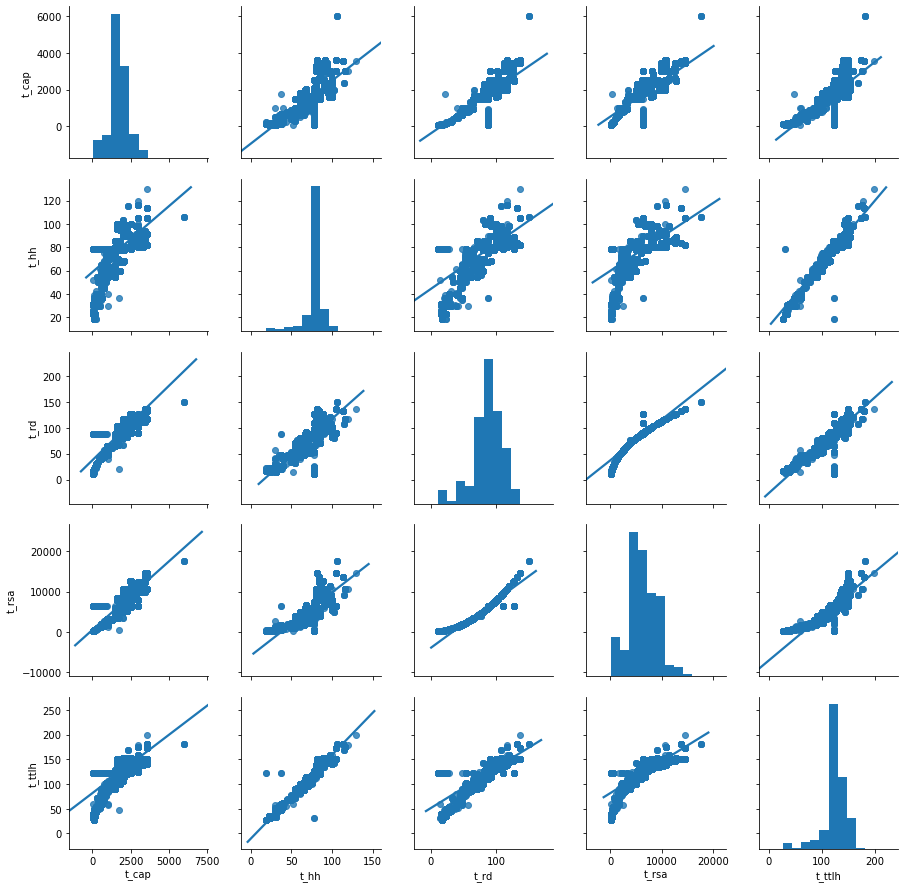

In [14]:
# visualization to see if there is linear connection between features and the target value
plt.figure(figsize = (25,17))
gr_pair=sns.pairplot(df[['t_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh']], kind="reg")

<Figure size 1800x1224 with 0 Axes>

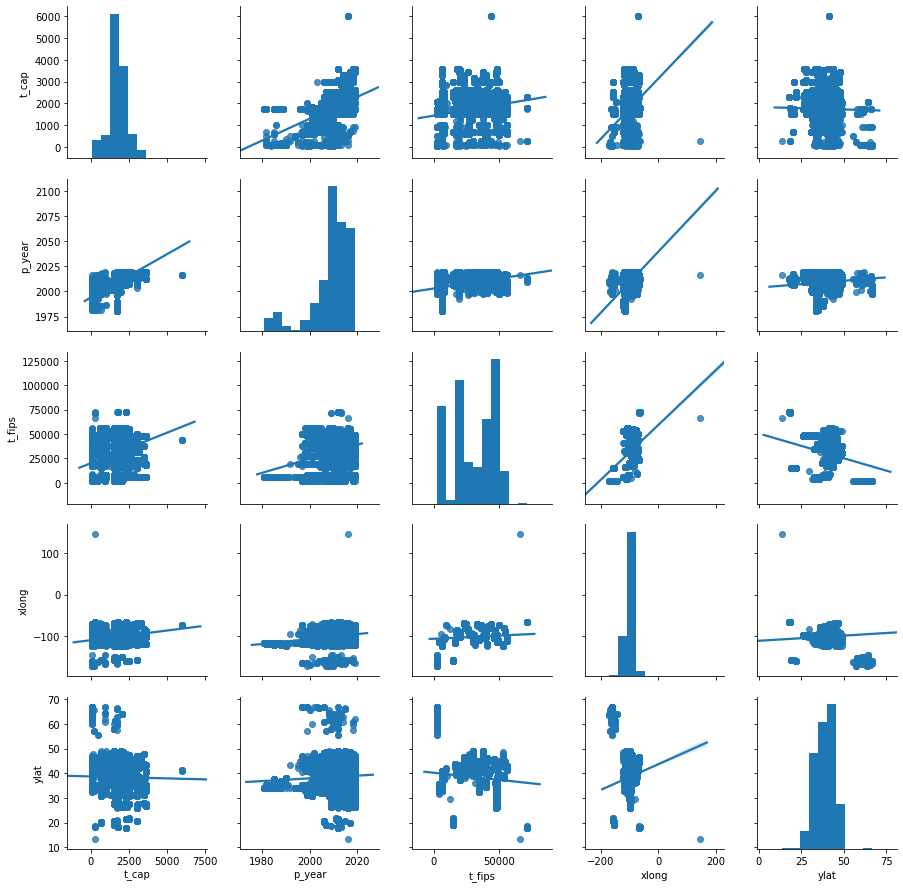

In [280]:
plt.figure(figsize = (25,17)) # are location features have linear connection with the turbine capacity ? 
gr_pair=sns.pairplot(df[['t_cap', 't_fips', 'xlong', 'ylat']], kind="reg")

In [337]:
# correlation matrix between the features
corr_columns=["p_cap", "p_tnum", "t_cap", "t_hh", "t_rd", "t_rsa", "t_ttlh", "t_fips", "xlong", "ylat", "t_conf_atr", "t_conf_loc", 'p_year']
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,p_cap,p_tnum,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_fips,xlong,ylat,t_conf_atr,t_conf_loc,p_year
p_cap,1.000000,0.249635,0.396875,0.304127,0.436712,0.428025,0.367824,0.159197,0.159872,-0.096202,0.171410,-0.058788,0.441603
p_tnum,0.249635,1.000000,-0.224661,-0.215819,-0.181291,-0.140662,-0.205292,-0.272344,-0.257148,-0.164196,-0.315147,0.051925,-0.519348
t_cap,0.396875,-0.224661,1.000000,0.622951,0.838056,0.811027,0.732117,0.250038,0.253077,-0.019020,0.181427,-0.104033,0.660239
t_hh,0.304127,-0.215819,0.622951,1.000000,0.736936,0.677585,0.954708,0.151292,0.371086,0.019290,0.069269,-0.094449,0.529019
t_rd,0.436712,-0.181291,0.838056,0.736936,1.000000,0.969647,0.867529,0.209403,0.273835,-0.066293,0.128063,-0.133719,0.689467
t_rsa,0.428025,-0.140662,0.811027,0.677585,0.969647,1.000000,0.843512,0.164349,0.227908,-0.107379,0.125271,-0.156942,0.642055
t_ttlh,0.367824,-0.205292,0.732117,0.954708,0.867529,0.843512,1.000000,0.157223,0.320509,-0.039639,0.079218,-0.119141,0.592371
t_fips,0.159197,-0.272344,0.250038,0.151292,0.209403,0.164349,0.157223,1.000000,0.205119,-0.169712,0.215670,0.008350,0.377778
xlong,0.159872,-0.257148,0.253077,0.371086,0.273835,0.227908,0.320509,0.205119,1.000000,0.113584,0.193148,-0.095543,0.423995
ylat,-0.096202,-0.164196,-0.019020,0.019290,-0.066293,-0.107379,-0.039639,-0.169712,0.113584,1.000000,0.076756,-0.055467,0.086596


In [282]:
# Correlation vector according to my target
corr_mtrx=df.corr()
corr_mtrx["t_cap"].sort_values(ascending=False)

t_cap         1.000000
t_rd          0.838056
t_rsa         0.811027
t_ttlh        0.732117
p_year        0.660239
t_hh          0.622951
p_cap         0.396875
xlong         0.253077
t_fips        0.250038
case_id       0.245472
t_conf_atr    0.181427
ylat         -0.019020
t_conf_loc   -0.104033
p_tnum       -0.224661
Name: t_cap, dtype: float64

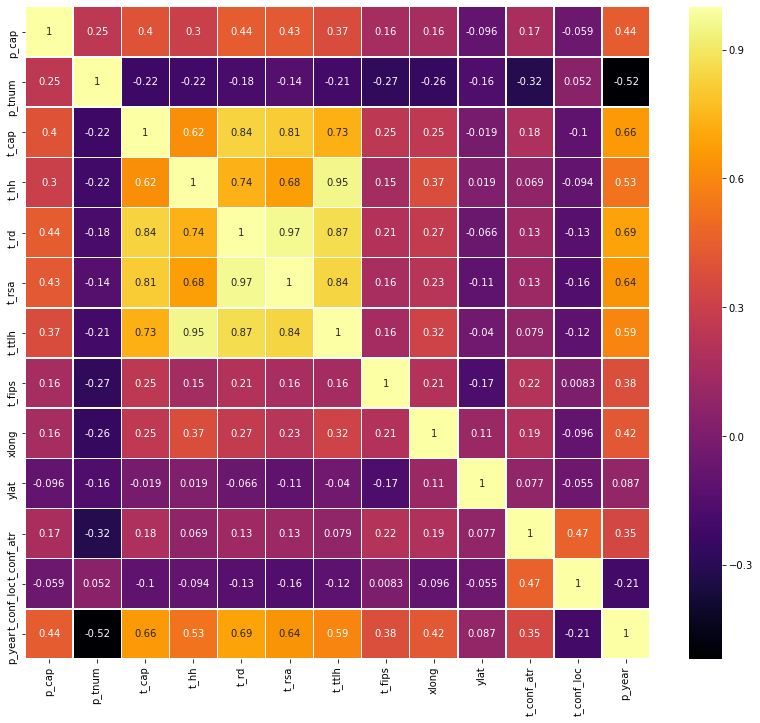

In [338]:
# Draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='inferno')

In [299]:
# Firstly, I use statsmodels library to estimate turbine capacities
# in the first model I choose features which are highly correlated with my target

lm_ols_1 = smf.ols('t_cap ~ t_hh + t_rd + t_rsa + t_ttlh', data=df)
fit_ols_1 = lm_ols_1.fit()
fit_ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 3.722e+04
Date:                Sun, 15 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:39:59   Log-Likelihood:            -4.5877e+05
No. Observations:               63003   AIC:                         9.175e+05
Df Residuals:                   62998   BIC:                         9.176e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -470.4776     12.843    -36.633      0.000    -495.650    -445.305
t_hh          -4.3478      0.716     -6.073      0.000      -5.751      -2.945
t_rd          25.3876      0.299     84.869      0.000      24.801      25.974
t_rsa         -0.0190      0.003     -6.447      0.000      -0.025      -0.013
t_ttlh         3.7842      0.534      7.085      0.000       2.737       4.831
==============================================================================
Omnibus:                    16424.609   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184787.623
Skew:                          -0.933   Prob(JB):                         0.00
Kurtosis:                      11.180   Cond. No.                     6.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [343]:
# I'm adding new features to improve my model
X = df.drop(columns=['case_id', 't_cap', 'p_cap', 'p_tnum', 't_state', 't_county', 'p_name', 't_img_srce',
                     'xlong', 'ylat']).astype(float)
y = df['t_cap'].astype(float)

lm_ols_2 = sm.OLS(y, sm.add_constant(X))
fit_ols_2 = lm_ols_2.fit()
fit_ols_2.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  t_cap   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 2.016e+04
Date:                Sun, 15 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:32:19   Log-Likelihood:            -4.5697e+05
No. Observations:               63003   AIC:                         9.140e+05
Df Residuals:                   62994   BIC:                         9.140e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.002e+04    553.154    -36.184      0.000   -2.11e+04   -1.89e+04
t_fips         0.0017   9.25e-05     18.645      0.000       0.002       0.002
p_year         9.7973      0.279     35.120      0.000       9.250      10.344
t_hh          -8.2454      0.705    -11.694      0.000      -9.627      -6.863
t_rd          20.2737      0.317     63.956      0.000      19.652      20.895
t_rsa         -0.0098      0.003     -3.277      0.001      -0.016      -0.004
t_ttlh         6.9373      0.527     13.163      0.000       5.904       7.970
t_conf_atr    35.4565      3.012     11.771      0.000      29.552      41.361
t_conf_loc     6.2526      3.592      1.741      0.082      -0.787      13.292
==============================================================================
Omnibus:                     7141.210   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63771.245
Skew:                          -0.179   Prob(JB):                         0.00
Kurtosis:                       7.916   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Linear regression with Sklearn  

lm  = LinearRegression()

X = df.loc[:, ['t_fips', 't_rd', 't_hh', 't_ttlh', 't_rsa', 't_conf_atr', 't_conf_loc', 'p_year']].astype(float)
y = df['t_cap'].astype(float)
X.info()
y.sample(5, random_state=55)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63003 entries, 0 to 63002
Data columns (total 8 columns):
t_fips        63003 non-null float64
t_rd          63003 non-null float64
t_hh          63003 non-null float64
t_ttlh        63003 non-null float64
t_rsa         63003 non-null float64
t_conf_atr    63003 non-null float64
t_conf_loc    63003 non-null float64
p_year        63003 non-null float64
dtypes: float64(8)
memory usage: 3.8 MB


46110     500.000000
50944    1790.000000
20987      90.000000
40890    1600.000000
61864    1744.390079
Name: t_cap, dtype: float64

In [9]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=55)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=76)

X_train.shape # shape of my train set

(37801, 8)

In [10]:
# fit & predict operations
lm.fit(X_train, y_train)
pred = lm.predict(X_val)

print('R Sq. : {}'.format(lm.score(X_val,y_val)))
print('Mean Squared Error : {}'.format(mean_squared_error(pred, y_val)))

R Sq. : 0.7187734967215893
Mean Squared Error : 118031.25094092108


In [11]:
# i create a new dataframe to show coefficients
coefs = DataFrame(X_train.columns)
coefs['Coefficient Estimate'] = Series(lm.coef_)
coefs

,0,Coefficient Estimate
0,t_fips,0.001629
1,t_rd,20.478543
2,t_hh,-8.325811
3,t_ttlh,6.967909
4,t_rsa,-0.011382
5,t_conf_atr,36.576620
6,t_conf_loc,3.672105
7,p_year,9.726774


In [331]:
# Regularization 
# Modeling with Ridge regression model

ridge_regr = Ridge(alpha=0.0005, normalize=True)
ridge_regr.fit(X_train, y_train)

pred = ridge_regr.predict(X_val)

print('R Sq. : {}'.format(ridge_regr.score(X_val, y_val)))
print('Mean Squared Error : {}'.format(mean_squared_error(pred, y_val)))

R Sq. : 0.7187865083832482
Mean Squared Error : 118025.78992396669


In [315]:
coefs_r = DataFrame(X_train.columns)
coefs_r['Coefficient Estimate'] = Series(ridge_regr.coef_)
coefs_r

,0,Coefficient Estimate
0,t_fips,0.001638
1,t_rd,20.156222
2,t_hh,-7.698027
3,t_ttlh,6.535497
4,t_rsa,-0.007971
5,t_conf_atr,35.771633
6,t_conf_loc,4.617565
7,p_year,9.794794


In [28]:
# Modeling with Lasso regr model 
lasso_regr = Lasso(alpha=0.00005, normalize=True)
lasso_regr.fit(X_train, y_train)

pred = lasso_regr.predict(X_val)

print('R Sq. : {}'.format(lasso_regr.score(X_val, y_val)))
print('Mean Squared Error : {}'.format(mean_squared_error(pred, y_val)))

R Sq. : 0.7187747310998632
Mean Squared Error : 118030.73287021965


In [295]:
coefs_l = DataFrame(X_train.columns)
coefs_l['Coefficient Estimate'] = Series(lasso_regr.coef_)
coefs_l

,0,Coefficient Estimate
0,t_fips,0.001629
1,t_rd,20.448263
2,t_hh,-8.225936
3,t_ttlh,6.895221
4,t_rsa,-0.010963
5,t_conf_atr,36.488380
6,t_conf_loc,3.751184
7,p_year,9.729159


In [12]:
# Modeling via Cross Validation : kFold
lm_cv = LinearRegression()

kf=KFold(n_splits=10, shuffle=True, random_state=55)
cvs=cross_val_score(lm_cv, X_train, y_train, cv=kf, scoring='r2')

print('R Sq. : {}'.format(np.mean(cvs))) 

R Sq. : 0.7203501827245351


In [13]:
# RidgeCV Model
ridge_cv = RidgeCV(alphas=(0.0001, 0.0005, 0.001, 0.01, 0.05), normalize=True, cv=kf).fit(X_train,y_train)
ridge_cv_pred=ridge_cv.predict(X_val)

print('R Sq. : {}'.format(ridge_cv.score(X_val, y_val)))
print('Mean Squared Error : {}'.format(mean_squared_error(ridge_cv_pred, y_val)))

R Sq. : 0.718777105003396
Mean Squared Error : 118029.73653879172


In [26]:
# LassoCV Model
lasso_cv = LassoCV(alphas=(0.0001, 0.0005, 0.001, 0.01, 0.05), normalize=True, cv=kf).fit(X_train,y_train)
lasso_cv_pred=lasso_cv.predict(X_val)

print('R Sq. : {}'.format(lasso_cv.score(X_val, y_val)))
print('Mean Squared Error : {}'.format(mean_squared_error(lasso_cv_pred, y_val)))

R Sq. : 0.7187757753861819
Mean Squared Error : 118030.29458144143


In [29]:
# Comparison of predictions of Lasso with Test dataset
df_c=X_test.copy()
df_c['t_cap']=y_test
df_c['t_cap_predict']=lasso_regr.predict(X_test)
df_c.sample(12,random_state=76)

,t_fips,t_rd,t_hh,t_ttlh,t_rsa,t_conf_atr,t_conf_loc,p_year,t_cap,t_cap_predict
6839,26063.0,100.0,80.000000,130.100000,7853.980000,3.0,3.0,2014.0,1700.0,2080.082058
42045,38101.0,77.0,80.000000,118.600000,4656.630000,3.0,3.0,2009.0,1500.0,1536.496401
42713,48105.0,127.0,78.377308,122.512282,6381.428501,1.0,3.0,2019.0,2500.0,2620.939912
4388,23021.0,112.0,94.000000,150.000000,9852.030000,3.0,3.0,2016.0,3300.0,2340.110983
44570,40149.0,82.5,80.000000,121.300000,5345.620000,3.0,3.0,2012.0,1600.0,1692.550096
47632,41021.0,100.0,85.000000,135.000000,7853.980000,3.0,3.0,2011.0,2500.0,2067.922835
37134,6025.0,108.0,80.000000,134.100000,9160.880000,3.0,3.0,2012.0,2370.0,2204.815329
44462,16077.0,100.0,80.000000,130.100000,7853.980000,3.0,3.0,2011.0,1800.0,2034.624206
15627,41061.0,82.0,70.000000,110.900000,5281.020000,3.0,3.0,2007.0,1650.0,1646.423354
47541,50005.0,93.0,80.000000,126.500000,6792.910000,3.0,3.0,2011.0,2500.0,1933.575251


In [23]:
# Comparison of predictions of LassoCV with Test dataset
df_cm=X_test.copy()
df_cm['t_cap']=y_test
df_cm['t_cap_predict']=lasso_cv.predict(X_test)
df_cm.sample(12,random_state=76)

,t_fips,t_rd,t_hh,t_ttlh,t_rsa,t_conf_atr,t_conf_loc,p_year,t_cap,t_cap_predict
6839,26063.0,100.0,80.000000,130.100000,7853.980000,3.0,3.0,2014.0,1700.0,2079.917059
42045,38101.0,77.0,80.000000,118.600000,4656.630000,3.0,3.0,2009.0,1500.0,1536.516844
42713,48105.0,127.0,78.377308,122.512282,6381.428501,1.0,3.0,2019.0,2500.0,2619.928490
4388,23021.0,112.0,94.000000,150.000000,9852.030000,3.0,3.0,2016.0,3300.0,2340.375626
44570,40149.0,82.5,80.000000,121.300000,5345.620000,3.0,3.0,2012.0,1600.0,1692.504852
47632,41021.0,100.0,85.000000,135.000000,7853.980000,3.0,3.0,2011.0,2500.0,2067.901250
37134,6025.0,108.0,80.000000,134.100000,9160.880000,3.0,3.0,2012.0,2370.0,2204.650803
44462,16077.0,100.0,80.000000,130.100000,7853.980000,3.0,3.0,2011.0,1800.0,2034.447140
15627,41061.0,82.0,70.000000,110.900000,5281.020000,3.0,3.0,2007.0,1650.0,1646.111873
47541,50005.0,93.0,80.000000,126.500000,6792.910000,3.0,3.0,2011.0,2500.0,1933.443518


Max score that I achieved is 0.72, this result is from linear regression in cross-validation. Therefore, Turbine characteristics and location infos aren’t enough to make a proper estimation and build a robust regression model at least with the features I have, so I need expanse my dataframe. You can read more detailed results from the presentation in this folder.  